In [27]:
%matplotlib inline
import pandas as pd

In [28]:
from IPython.core.display import HTML
css = open(r"style-table.css").read() + open(r"style-notebook.css").read()
HTML('<style>{}</style>'.format(css))

In [29]:
titles = pd.DataFrame.from_csv(r"data/titles.csv", index_col=None)
titles.head()

,title,year
0,The Symbol of Sacrifice,1918
1,Galactic Raiders,2004
2,Haytabo,1971
3,Can pazari,1976
4,Bel amour,1951


In [30]:
cast = pd.DataFrame.from_csv(r"data/cast.csv", index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [31]:
#What are the ten most common movie names of all time?
titles.title.value_counts().head(10)

Hamlet                  20
Carmen                  17
Macbeth                 16
Temptation              12
Maya                    12
The Outsider            12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

In [37]:
# Extra Question - find and list top 5 years in which Hamlet was released
titles[titles.title == 'Hamlet'].sort_values('year',ascending=False).head(5)

,title,year
40835,Hamlet,2017
159092,Hamlet,2016
143621,Hamlet,2015
5661,Hamlet,2014
42571,Hamlet,2011


In [38]:
#Which three years of the 1930s saw the most films released?
titles[(titles.year // 10 == 193)].year.value_counts().head(3)

1937    1224
1936    1169
1938    1163
Name: year, dtype: int64

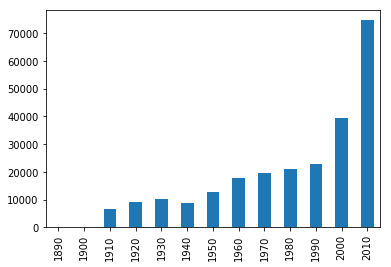

In [117]:
#Plot the number of films that have been released each decade over the history of cinema.
#titles.sort_values('year',ascending=False).head(10)
#titles[titles.year <= now.year].sort_values('year').head()
import datetime; now = datetime.datetime.now()
y1 = titles[titles.year <= now.year]
#y1.sort_values('year')
y1 = (y1.year // 10) * 10
y1.value_counts().sort_index().plot(kind='bar')

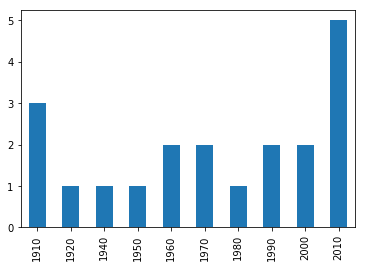

In [131]:
#Plot the number of "Hamlet" films made each decade.
t1 = titles[titles.title == 'Hamlet']
t1 = (t1.year // 10) * 10
t1.value_counts().sort_index().plot(kind='bar')

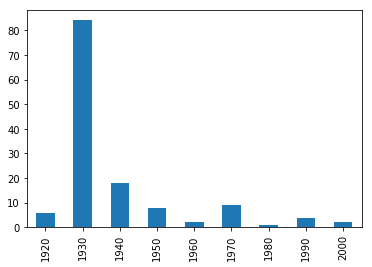

In [137]:
#Plot the number of "Rustler" characters in each decade of the history of film.
c1 = cast[cast.character == 'Rustler']
c1 = (c1.year // 10 ) * 10
c1.value_counts().sort_index().plot(kind='bar')

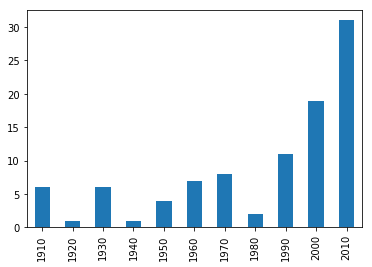

In [144]:
#Plot the number of "Hamlet" characters each decade.
c1 = cast[cast.character == 'Hamlet']
c1 = (c1.year // 10 ) * 10
c1.value_counts().sort_index().plot(kind='bar')

In [155]:
#What are the 11 most common character names in movie history?
#cast.character.value_counts().head(11)
cast.character.value_counts().sort_values(ascending=False).head(11)

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Herself         6705
Name: character, dtype: int64

In [174]:
#Who are the 10 people most often credited as "Herself" in film history?
c1 = cast[cast.character == 'Herself']
c1.name.value_counts().sort_values(ascending=False).head(10)

Queen Elizabeth II           12
Joyce Brothers                9
Mar?a Luisa (V) Mart?n        9
Luisa Horga                   9
Hillary Clinton               8
Margaret Thatcher             8
Marta Berrocal                6
In?s J. Southern              6
Rekha                         6
Mar?a Isabel (III) Mart?n     6
Name: name, dtype: int64

In [177]:
#Which actors or actresses appeared in the most movies in the year 1945?
cast[cast.year == 1945].name.value_counts().sort_values(ascending=False).head(10)

Emmett Vogan       39
Sam (II) Harris    33
Harold Miller      29
Bess Flowers       29
Frank O'Connor     27
Nolan Leary        27
Franklyn Farnum    27
Larry Steers       25
Herman Hack        25
Kenner G. Kemp     24
Name: name, dtype: int64

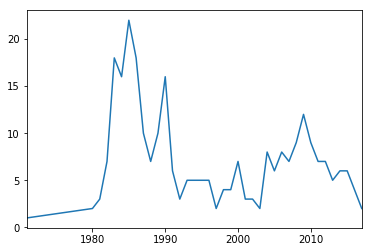

In [241]:
#Plot how many roles Mammootty has played in each year of his career.
c1 = cast[cast.name == 'Mammootty']
#c1.year.value_counts().sort_index() 
c1.year.value_counts().sort_index().plot()

In [274]:
#What are the 10 most frequent roles (character) that start with the phrase "Patron in"?
# 1
c1 = cast[cast.character.str.contains ('Patron in ')]
c1.character.value_counts().sort_values(ascending=False).head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Club                   3
Patron in Restaurant             3
Patron in cabaret                3
Theatre Patron in Loge           2
Name: character, dtype: int64

In [277]:
#What are the 10 most frequent roles (character) that start with the phrase "Patron in"?
# 2
c1 = cast[cast.character.str.startswith ('Patron in ')]
c1.character.value_counts().sort_values(ascending=False).head(10)

Patron in Frisky Rabbit         16
Patron in the Coffee House       9
Patron in Chinese Restaurant     9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in Club                   3
Patron in cabaret                3
Patron in Restaurant             3
Patron in Quiet Bar              2
Name: character, dtype: int64

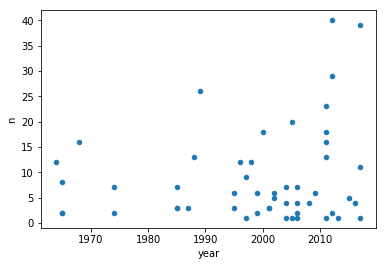

In [326]:
#Plot the n-values of the roles that Judi Dench has played over her career.
c1 = cast[(cast.name == 'Judi Dench') & (cast.n.notnull())]
c1 = c1.sort_values('year')
c1.plot(x='year', y='n', kind='scatter')

In [343]:
#How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s
cast[(cast.n == 1) & (cast.year // 10 ==  195)].type.value_counts()

actor      6692
actress    3040
Name: type, dtype: int64

In [355]:
##An Extra Question - How many leading (n=1) roles were available to actors in the 1950s
len(cast[(cast.n == 1) & (cast.year // 10 ==  195) & (cast.type == 'actor')])

6692